In [2]:
library(MASS)
library(plyr)
library(dplyr)
library(readr)
library(ggplot2)
library(reshape2)

In [3]:
options(repr.plot.height=5)
options(repr.matrix.max.rows=20)
options(repr.matrix.max.columns=10)

# Load Lenskit 1M

In [186]:
lenskit.meta = read_delim("data/lk1m/users.dat", delim=":",
                   col_names=c("user", "gender", "age", "occupation", "zip"),
                   col_types="i_c_c_c_c") %>%
    mutate(gender=as.factor(gender),
           
          dataset = "Lenskit-1m")

lenskit.meta$age[ as.numeric(lenskit.meta$age) < 18] <- "[1-17]"
lenskit.meta$age[as.numeric(lenskit.meta$age) >= 18 & as.numeric(lenskit.meta$age) < 25] <- "[18-24]"
lenskit.meta$age[as.numeric(lenskit.meta$age) >= 25 &  as.numeric(lenskit.meta$age) < 35] <- "[25-34]"
lenskit.meta$age[as.numeric(lenskit.meta$age) >= 35 &  as.numeric(lenskit.meta$age) < 45] <- "[35-44]"
lenskit.meta$age[as.numeric(lenskit.meta$age) >= 45 & as.numeric(lenskit.meta$age) < 56] <- "[45-55]"
lenskit.meta$age[as.numeric(lenskit.meta$age) >= 56 ] <- "[56+]"
lenskit.meta$age = as.factor(lenskit.meta$age)
#lenskit.meta


Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 18 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 18 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 25 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 25 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 35 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 35 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 45 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$ag

In [188]:
user.results.lenskit1m = read_csv("data/lk1m/eval-users.csv", guess_max=10000) %>%
    rename(user=User) %>%
    inner_join(users.meta %>% rename(user=id) %>% select(-key))
user.results.lenskit1m$DataSet="Lenskit1M"
#user.results

Parsed with column specification:
cols(
  DataSet = col_character(),
  Partition = col_integer(),
  Algorithm = col_character(),
  User = col_integer(),
  TestTime = col_double(),
  TopN.nDCG = col_double(),
  Rank = col_integer(),
  RecipRank = col_double(),
  AvgPrec = col_double()
)
Joining, by = "user"


# Load Last.FM

In [189]:
##### id,key,gender,age

usersLastfm = read_delim("data/lastfm/lastfm-users.csv", delim=",", 
                   col_names=c("id", "key", "gender", "age") )
#usersLastfm <-  subset(usersLastfm, select = c("user", "gender", "age"))
#usersLastfm$age <- as.integer(usersLastfm$age)
usersLastfm$age <- as.numeric(as.character(usersLastfm$age))
usersLastfm$gender[usersLastfm$gender == "f"] <- "F"
usersLastfm$gender[usersLastfm$gender == "m"] <- "M"
usersLastfm$age[ as.numeric(usersLastfm$age) < 18] <- "[1-17]"
usersLastfm$age[as.numeric(usersLastfm$age) >= 18 & as.numeric(usersLastfm$age) < 25] <- "[18-24]"
usersLastfm$age[as.numeric(usersLastfm$age) >= 25 &  as.numeric(usersLastfm$age) < 35] <- "[25-34]"
usersLastfm$age[as.numeric(usersLastfm$age) >= 35 &  as.numeric(usersLastfm$age) < 45] <- "[35-44]"
usersLastfm$age[as.numeric(usersLastfm$age) >= 45 & as.numeric(usersLastfm$age) < 56] <- "[45-55]"
usersLastfm$age[as.numeric(usersLastfm$age) >= 56 ] <- "[56+]"
#usersLastfm$dataset = as.factor("LastFM")
usersLastfm$age = as.factor(usersLastfm$age)

users.meta=usersLastfm
usersLastfm

Parsed with column specification:
cols(
  id = col_integer(),
  key = col_character(),
  gender = col_character(),
  age = col_integer()
)
Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 18 & as.numeric(usersLastfm$age) < :
“NAs introduced by coercion”Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 18 & as.numeric(usersLastfm$age) < :
“NAs introduced by coercion”Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 25 & as.numeric(usersLastfm$age) < :
“NAs introduced by coercion”Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 25 & as.numeric(usersLastfm$age) < :
“NAs introduced by coercion”Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 35 & as.numeric(usersLastfm$age) < :
“NAs introduced by coercion”Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 35 & as.numeric(usersLastfm$age) < :
“NAs introduced by coercion”Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 45 & as.n

id,key,gender,age
1,00000c289a1829a808ac09c00daf10bc3c4e223b,F,[18-24]
2,00001411dc427966b17297bf4d69e7e193135d89,F,NA
3,00004d2ac9316e22dc007ab2243d6fcb239e707d,NA,NA
4,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,M,[18-24]
5,00007a47085b9aab8af55f52ec8846ac479ac4fe,M,[25-34]
6,0000c176103e538d5c9828e695fed4f7ae42dd01,M,[18-24]
7,0000ee7dd906373efa37f4e1185bfe1e3f8695ae,M,[1-17]
8,0000ef373bbd0d89ce796abae961f2705e8c1faf,F,[18-24]
9,0000f687d4fe9c1ed49620fbc5ed5b0d7798ea20,F,[18-24]
10,0001399387da41d557219578fb08b12afa25ab67,M,NA


In [190]:
user.results.lastFm = read_csv("data/lastfm/lastfm-user-results.csv", guess_max=10000) %>%
    rename(user=User) %>%
    inner_join(users.meta %>% rename(user=id) %>% select(-key))
user.results.lastFm

Parsed with column specification:
cols(
  DataSet = col_character(),
  Partition = col_integer(),
  Algorithm = col_character(),
  User = col_integer(),
  TestTime = col_double(),
  TopN.nDCG = col_double(),
  Rank = col_integer(),
  RecipRank = col_double(),
  AvgPrec = col_double()
)
Joining, by = "user"


DataSet,Partition,Algorithm,user,TestTime,TopN.nDCG,Rank,RecipRank,AvgPrec,gender,age
LastFM.UI,2,PopCt,11,0.274,NaN,NA,0.0000000,0.0000000,M,[25-34]
LastFM.UI,2,Pop,11,0.287,NaN,NA,0.0000000,0.0000000,M,[25-34]
LastFM,1,Pop,69,0.452,NaN,NA,0.0000000,0.0000000,F,[18-24]
LastFM.UI,3,Pop,1,0.350,NaN,NA,0.0000000,0.0000000,F,[18-24]
LastFM.UI,3,PopCt,1,0.341,NaN,NA,0.0000000,0.0000000,F,[18-24]
LastFM.UI,4,Pop,70,0.303,NaN,NA,0.0000000,0.0000000,F,[18-24]
LastFM.UI,2,PopCt,21,0.093,NaN,NA,0.0000000,0.0000000,M,NA
LastFM.UI,4,PopCt,70,0.283,NaN,NA,0.0000000,0.0000000,F,[18-24]
LastFM.UI,2,Pop,21,0.089,NaN,NA,0.0000000,0.0000000,M,NA
LastFM,1,Pop,92,0.086,NaN,3,0.3333333,0.1766667,M,[25-34]


# Concat Datasets

In [191]:
user.results <- rbind.fill(user.results.lastFm,user.results.lenskit1m)
user.results

DataSet,Partition,Algorithm,user,TestTime,TopN.nDCG,Rank,RecipRank,AvgPrec,gender,age
LastFM.UI,2,PopCt,11,0.274,NaN,NA,0.0000000,0.0000000,M,[25-34]
LastFM.UI,2,Pop,11,0.287,NaN,NA,0.0000000,0.0000000,M,[25-34]
LastFM,1,Pop,69,0.452,NaN,NA,0.0000000,0.0000000,F,[18-24]
LastFM.UI,3,Pop,1,0.350,NaN,NA,0.0000000,0.0000000,F,[18-24]
LastFM.UI,3,PopCt,1,0.341,NaN,NA,0.0000000,0.0000000,F,[18-24]
LastFM.UI,4,Pop,70,0.303,NaN,NA,0.0000000,0.0000000,F,[18-24]
LastFM.UI,2,PopCt,21,0.093,NaN,NA,0.0000000,0.0000000,M,NA
LastFM.UI,4,PopCt,70,0.283,NaN,NA,0.0000000,0.0000000,F,[18-24]
LastFM.UI,2,Pop,21,0.089,NaN,NA,0.0000000,0.0000000,M,NA
LastFM,1,Pop,92,0.086,NaN,3,0.3333333,0.1766667,M,[25-34]


# Analyze by Gender

In [220]:
gender.results = user.results %>%
    group_by(DataSet, Algorithm, gender) %>%
    summarize( MRR=mean(RecipRank, na.rm=TRUE))
gender.tall = melt(gender.results, variable.name = "Metric")


Using DataSet, Algorithm, gender as id variables


In [221]:
overall.results = user.results %>%
    group_by(DataSet, Algorithm) %>%
    summarize( MRR=mean(RecipRank, na.rm=TRUE))
combined.results = rbind(gender.results, mutate(overall.results))
combined.tall = melt(combined.results, variable.name='Metric')


Using DataSet, Algorithm, gender as id variables


In [222]:
combined.tall$Algorithm[combined.tall$Algorithm == "Pop"] <- "POP-B"
combined.tall$Algorithm[combined.tall$Algorithm == "PopCt"] <- "POP-C"

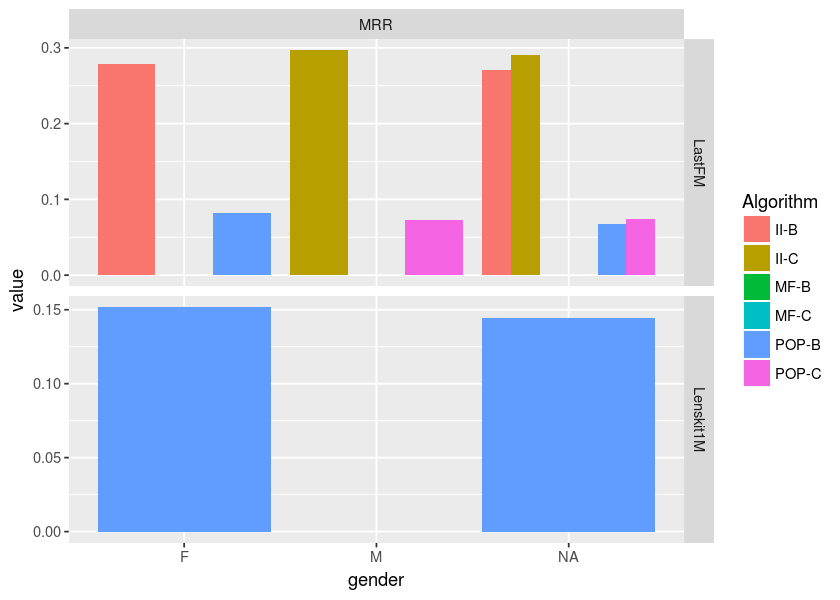

In [223]:

ggplot(combined.tall %>% filter(Metric == 'MRR', DataSet==c("LastFM","Lenskit1M"),
                                grepl("(-B)|(-C)", Algorithm)                             
                               
                               )) +
    aes(x=gender, y=value, fill=Algorithm) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(DataSet ~  Metric
               , scales="free")

# Analyze by Age

In [211]:
age.results = user.results %>%
    group_by(DataSet, Algorithm, age) %>%
   summarize( MRR=mean(RecipRank, na.rm=TRUE))
age.tall = melt(age.results, variable.name = "Metric")


Using DataSet, Algorithm, age as id variables


In [212]:
overall.results = user.results %>%
    group_by(DataSet, Algorithm) %>%
    summarize( MRR=mean(RecipRank, na.rm=TRUE))
combined.results = rbind(age.results, mutate(overall.results))
combined.tall = melt(combined.results, variable.name='Metric')
combined.tall$Algorithm[combined.tall$Algorithm == "Pop"] <- "POP-B"
combined.tall$Algorithm[combined.tall$Algorithm == "PopCt"] <- "POP-C"

Using DataSet, Algorithm, age as id variables


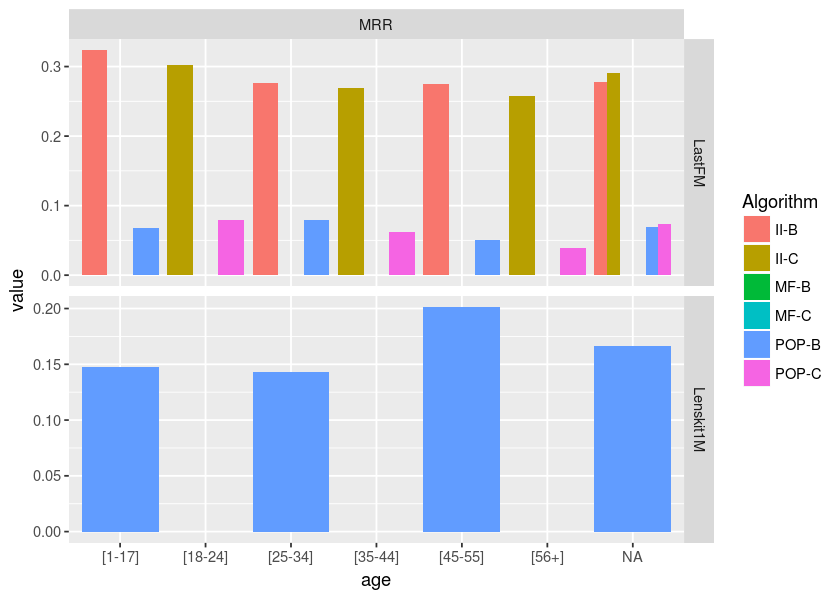

In [218]:
ggplot(combined.tall %>% filter(Metric == 'MRR', DataSet==c("LastFM","Lenskit1M"),
                                grepl("(-B)|(-C)", Algorithm)  )) +
    aes(x=age, y=value, fill=Algorithm) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(DataSet ~ Metric, scales="free")